# Метод Рунге-Кутты

## Реализация метода

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def runge_kutta(f, y_0, a, b, h):

    x_list = np.arange(a, b + h, h)
    y_list = []

    y_n = y_0
    
    for x_n in x_list:
        k_1 = f(x_n, y_n)
        k_2 = f(x_n + (h / 2), y_n + (h / 2) * k_1)
        k_3 = f(x_n + (h / 2), y_n + (h / 2) * k_2)
        k_4 = f(x_n + h, y_n + h * k_3)

        y_n = y_n + (h / 6) * (k_1 + (2 * k_2) + (2 * k_3) + k_4)
        y_list.append(y_n)
        
    return y_list

## Пример решения

Вариант по численному решению ОДУ методом Рунге-Кутты (a, b – границы интервала на котором ищем решение, h – шаг сетки, y(0) – начальные условия):

$$y' = \frac{xy}{1+x^2},$$

где $y(0)=2, a=0, b=0.5, h=0.05$.

Аналитическое решение:

$$y(x)=2\sqrt{x^2+1}$$

In [3]:
def f(x, y):
    return (x * y) / (1 + x ** 2)

Начальные условия:

In [4]:
y_0 = 2
a = 0
b = 0.5
h = 0.05

Результат работы метода:

In [5]:
result = runge_kutta(f, y_0, a, b, h)
result

[2.0024984400974701,
 2.0099751267517272,
 2.022374847087776,
 2.0396078146706351,
 2.0615528263291338,
 2.0880613198166031,
 2.1189620325461465,
 2.1540659495619963,
 2.1931712504318637,
 2.236068011240488,
 2.2825424785369037]

Результат аналитического решения для наших начальних условий:

In [6]:
def calc_exact_result(a, b, h):
    x_list = np.arange(a, b + h, h)
    exact_result = []

    for x_n in x_list:
        exact_result.append(2 * np.sqrt(x_n ** 2 + 1))

    return exact_result

In [7]:
exact_result = calc_exact_result(a, b, h)
exact_result

[2.0,
 2.0024984394500787,
 2.0099751242241779,
 2.0223748416156684,
 2.0396078054371141,
 2.0615528128088303,
 2.0880613017821101,
 2.118962010041709,
 2.1540659228538019,
 2.1931712199461311,
 2.2360679774997898]

## Сравнение результатов метода Рунге-Кутты и аналитического решения

In [8]:
x_list = np.arange(a, b + h, h)

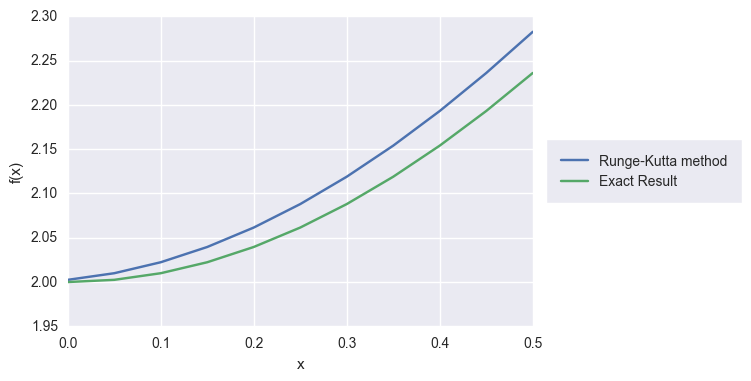

In [9]:
fig, ax = plt.subplots()
plt.plot(x_list, result, label="Runge-Kutta method")
plt.plot(x_list, exact_result, label="Exact Result")
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)
ax.set_ylabel('f(x)')
trash = ax.set_xlabel('x')

## Анализ ошибок метода Рунге-Кутты

Вектор ошибок для начального условия:

In [10]:
errors = np.abs(np.array(result) - np.array(exact_result))
print(errors)

[ 0.00249844  0.00747669  0.01239972  0.01723297  0.02194502  0.02650851
  0.03090073  0.03510394  0.03910533  0.04289679  0.0464745 ]


In [11]:
errors_list = []
h_list = np.arange(0.001, 0.5, 0.001)[::-1]

In [12]:
for each_h in h_list:
    result = runge_kutta(f, y_0, a, b, each_h)
    
    exact_result = calc_exact_result(a, b, each_h)
    
    errors = np.abs(np.array(result) - np.array(exact_result))
    errors_list.append(errors.mean())

График зависимости значения ошибки от величины шага в методе Рунге-Кутты:

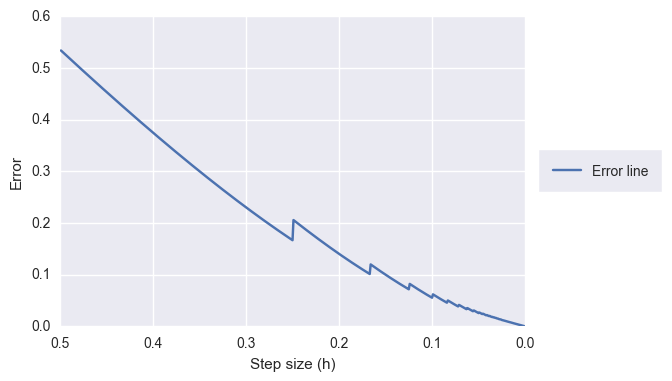

In [13]:
fig, ax = plt.subplots()
plt.plot(h_list, errors_list, label="Error line")
plt.xlim(0.5, 0)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)
ax.set_ylabel('Error')
trash = ax.set_xlabel('Step size (h)')